# 20 Newsgroups Dataset

The 20 Newsgroups dataset is a popular collection for text classification and clustering tasks in natural language processing (NLP). It contains approximately **20,000 newsgroup documents**, partitioned across **20 different newsgroups**, making it a versatile dataset for various text analysis applications.

## Newsgroup Categories:

The dataset is divided into the following 20 newsgroups:

1. **alt.atheism**
2. **comp.graphics**
3. **comp.os.ms-windows.misc**
4. **comp.sys.ibm.pc.hardware**
5. **comp.sys.mac.hardware**
6. **comp.windows.x**
7. **misc.forsale**
8. **rec.autos**
9. **rec.motorcycles**
10. **rec.sport.baseball**
11. **rec.sport.hockey**
12. **sci.crypt**
13. **sci.electronics**
14. **sci.med**
15. **sci.space**
16. **soc.religion.christian**
17. **talk.politics.guns**
18. **talk.politics.mideast**
19. **talk.politics.misc**
20. **talk.religion.misc**

## Key Features:

- **Text Data**: Each entry contains a raw text document from the respective newsgroup.
- **Multi-Class Classification**: The goal is to classify each document into one of the 20 categories.
- **Diverse Topics**: The dataset covers a wide range of subjects, making it suitable for various NLP tasks.

## Use Cases:

- **Text Classification**: Ideal for training and evaluating models in categorizing documents.
- **Clustering**: Useful for unsupervised learning tasks to group similar documents.
- **Topic Modeling**: Can be employed to identify topics within the text data.

The dataset is easily accessible through the `sklearn.datasets` module in Python, making it convenient for practitioners and researchers in the field of NLP.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')

# Step 1: Create a DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target
})

# Map target labels to newsgroup names
df['target'] = df['target'].map(dict(enumerate(newsgroups.target_names)))

# Step 2: Split the data into features (X) and labels (y)
X = df['text']
y = df['target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert messages to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Step 6: Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

# Step 8: Predict on a new document
sample_message = ['God is love', 'Open to the public', 'I am selling my car']
sample_vectorized = vectorizer.transform(sample_message)
sample_prediction = naive_bayes_model.predict(sample_vectorized)

# Output the predictions for the sample messages
for msg, pred in zip(sample_message, sample_prediction):
    print(f'The message: "{msg}" is classified as: {pred}')


Accuracy: 0.8745
Confusion Matrix:
[[138   0   0   0   0   0   0   0   0   0   0   0   1   0   1   4   1   0
    3   3]
 [  0 186   0   5   0   3   0   0   1   0   0   2   0   1   1   1   0   2
    0   0]
 [  0  38  69  46   6  25   0   3   0   0   0   3   3   0   0   0   0   0
    2   0]
 [  0  11   0 157   8   1   0   1   0   0   1   1   0   1   1   0   0   0
    1   0]
 [  0   1   1   9 185   1   2   1   0   0   0   2   2   0   1   0   0   0
    0   0]
 [  0  21   0   5   2 182   0   0   0   1   0   0   0   1   2   0   1   0
    0   0]
 [  0   4   0  24   5   0 135   9   1   1   3   0   4   1   1   0   2   1
    2   0]
 [  0   1   0   0   0   0   2 187   2   0   0   0   2   1   0   0   1   0
    0   0]
 [  0   0   0   1   0   0   4   2 158   0   0   0   1   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   0   0   1 203   5   0   0   0   0   1   0   0
    1   0]
 [  0   2   0   1   0   0   0   0   1   1 193   0   0   0   0   0   0   0
    0   0]
 [  0   4   1   0   0   0   0 

In [2]:
df.head()

,text,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
 1   target  18846 non-null  object
dtypes: object(2)
memory usage: 294.6+ KB


Target Distribution:
 target
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: count, dtype: int64
Text Length Statistics:
 count     18846.000000
mean       1902.525894
std        3984.970264
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
Name: text_length, dtype: float64
Word Count Statistics:
 count    18846.000000
mean       283.6

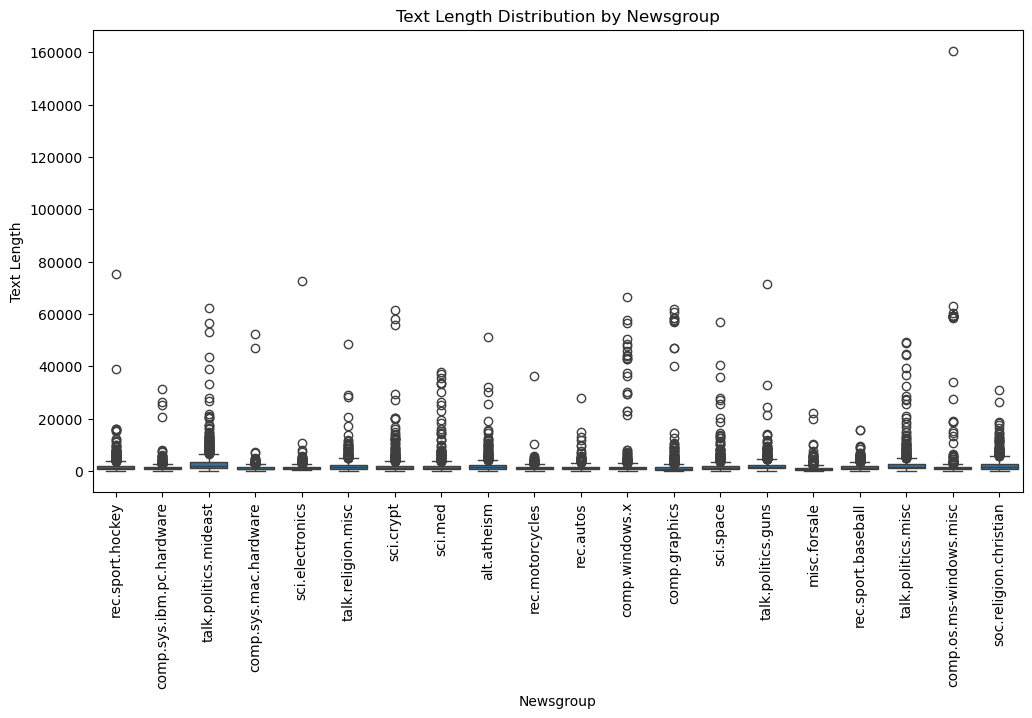

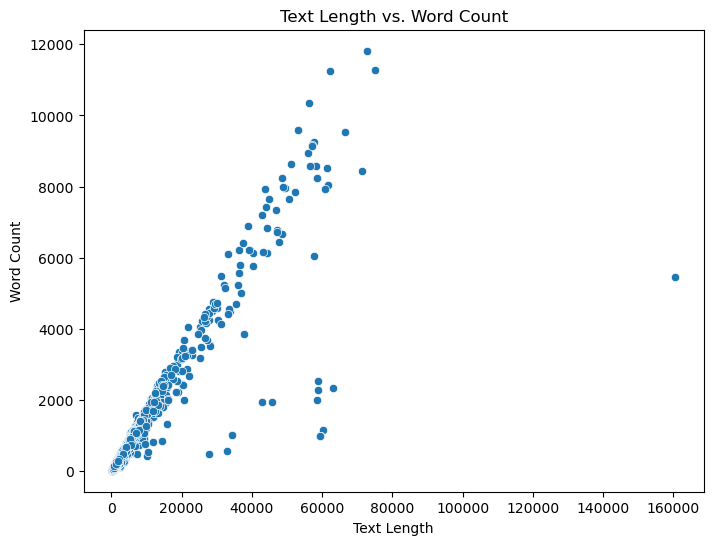

In [4]:
# Data Analysis and EDA


# 1. Target Distribution:
target_counts = df['target'].value_counts()
print("Target Distribution:\n", target_counts)

# 2. Text Length Analysis:
# Replace None values with empty strings before calculating length
df['text_length'] = df['text'].fillna('').apply(len)  # Change is here
print("Text Length Statistics:\n", df['text_length'].describe())

# 3. Word Count Analysis:
# Replace None values with empty strings before calculating word count
df['word_count'] = df['text'].fillna('').apply(lambda x: len(x.split()))  # Change is here
print("Word Count Statistics:\n", df['word_count'].describe())


# 4. Explore the distribution of text lengths for different newsgroups.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='text_length', data=df)
plt.xlabel('Newsgroup')
plt.ylabel('Text Length')
plt.title('Text Length Distribution by Newsgroup')
plt.xticks(rotation=90)
plt.show()


# 5. Explore the relationship between text length and word count.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='word_count', data=df)
plt.xlabel('Text Length')
plt.ylabel('Word Count')
plt.title('Text Length vs. Word Count')
plt.show()



# Optional: You can explore further by:
# - Analyzing the most frequent words in each newsgroup.
# - Examining the distribution of punctuation or other special characters.
# - Creating word clouds for different newsgroups.
# - Investigating the presence of specific keywords or phrases related to the newsgroup topics.



In [5]:
# prompt: to deploy the gradio interface attractive 

import gradio as gr

def predict_newsgroup(text):
  """Predicts the newsgroup category for a given text."""
  text_vectorized = vectorizer.transform([text])
  prediction = naive_bayes_model.predict(text_vectorized)[0]
  return prediction

# Customize the appearance of the interface
iface = gr.Interface(
    fn=predict_newsgroup,
    inputs=gr.Textbox(lines=5, label="Enter News Text", placeholder="Paste your news article here..."),
    outputs="text",
    title="20 Newsgroups Classifier",
    description="Enter some text and the model will predict which newsgroup it belongs to.",
    theme="default",  # Choose a theme (e.g., 'default', 'huggingface')
    allow_flagging="never",  # Disable flagging (optional)
    article="""
    ## Welcome to the 20 Newsgroups Classifier!

    This model is trained on the classic 20 Newsgroups dataset and can identify the category of a news article. 
    """,
    examples=[
        ["God is love"],
        ["Open to the public"],
        ["I am selling my car"]
    ]
)


iface.launch()


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [6]:
df['text'].value_counts()

text
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n                                                                           

In [7]:
X_test.value_counts()

text
From: shippert@cco.caltech.edu (Tim Shippert)\nSubject: Re: Infield Fly Rule\nOrganization: California Institute of Technology, Pasadena\nLines: 25\nNNTP-Posting-Host: sandman.caltech.edu\n\njrogoff@scott.skidmore.edu (jay rogoff) writes:\n\n>One last infield fly question that has always puzzled me and hasn't\n>yet been addressed.  I believe the rule also does *not* deal with this\n>situation:\n\n>However, if the Infield Fly is *not* caught, at what point can a runner\n>legally leave his base w/o fear of being doubled off for advancing too\n>early?  \n\n\tThe runner can leave his base at any time.  If the ball is caught,\nhe's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at\nall.  So, if he's feeling lucky, your runner at second can sprint for glory\nas soon as the ball is popped up.  If it isn't caught, he's probably scored\na run.  If it is, he's probably headed for AAA.  \n\n\tThe only effect the infield fly has is to make the batter out,\nthereby removing th

# AG News Dataset

The AG News dataset is a widely used benchmark for text classification tasks, particularly for news categorization. It consists of a total of **120,000 training samples** and **7,600 test samples**, categorized into four distinct classes:

1. **World**: News articles covering global events and international affairs.
2. **Sports**: Articles related to various sports, events, and athletes.
3. **Business**: News focusing on business, economics, and industry topics.
4. **Science & Technology**: Articles discussing scientific discoveries, technological advancements, and related topics.

## Key Features:

- **Text Data**: Each entry includes a news article title and its corresponding body text.
- **Multi-Class Classification**: The goal is to classify each article into one of the four predefined categories.
- **Balanced Classes**: Each class contains an approximately equal number of samples, making it suitable for training machine learning models.

## Use Cases:

- **Text Classification**: Ideal for training and testing models in natural language processing (NLP).
- **Sentiment Analysis**: Can be adapted for sentiment analysis tasks related to news topics.
- **Machine Learning Research**: Commonly used in academia and industry for benchmarking new algorithms and models.

The dataset is publicly available and widely utilized in various NLP research projects and competitions.


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datasets import load_dataset

# Load the dataset
ds = load_dataset("fancyzhx/ag_news")

# Convert the Hugging Face dataset to a pandas DataFrame
df = ds['train'].to_pandas()

# Step 1: Retain relevant columns and drop NaN values
df_clean = df[['label', 'text']].dropna()  # Drop rows with NaN values in 'label' or 'text'
df_clean.columns = ['label', 'message']  # Rename columns for clarity

# Step 2: Encode labels (1 to 4)
# Ensure that all label values are present in the map dictionary.
df_clean['label_encoded'] = df_clean['label'].map({1: 0, 2: 1, 3: 2, 4: 3})

# Remove any rows where 'label_encoded' is NaN
df_clean = df_clean.dropna(subset=['label_encoded'])

# Step 3: Split the data into training and testing sets
X = df_clean['message']
y = df_clean['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Convert messages to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 5: Train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# Step 6: Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

# Step 8: Predict on a new message
sample_message = ['The stock market is up today.', 'The team won the championship!']
sample_vectorized = vectorizer.transform(sample_message)
sample_prediction = naive_bayes_model.predict(sample_vectorized)

# Output the prediction for the sample messages
for msg, pred in zip(sample_message, sample_prediction):
    category = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science/Technology'}
    print(f'The message: "{msg}" is classified as: {category[pred]}')


Accuracy: 0.9352
Confusion Matrix:
[[5985   36   37]
 [  62 5392  556]
 [  38  438 5456]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6058
         1.0       0.92      0.90      0.91      6010
         2.0       0.90      0.92      0.91      5932

    accuracy                           0.94     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.94      0.94      0.94     18000

The message: "The stock market is up today." is classified as: Sports
The message: "The team won the championship!" is classified as: World


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
               label
count  120000.000000
mean        1.500000
std         1.118039
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


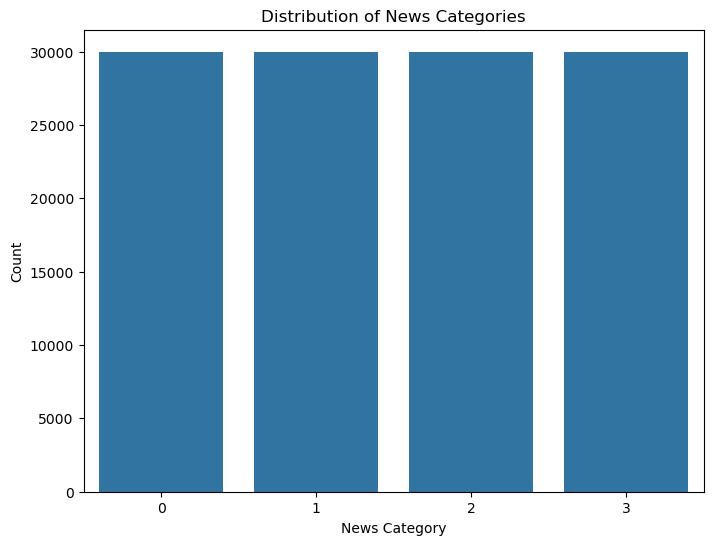

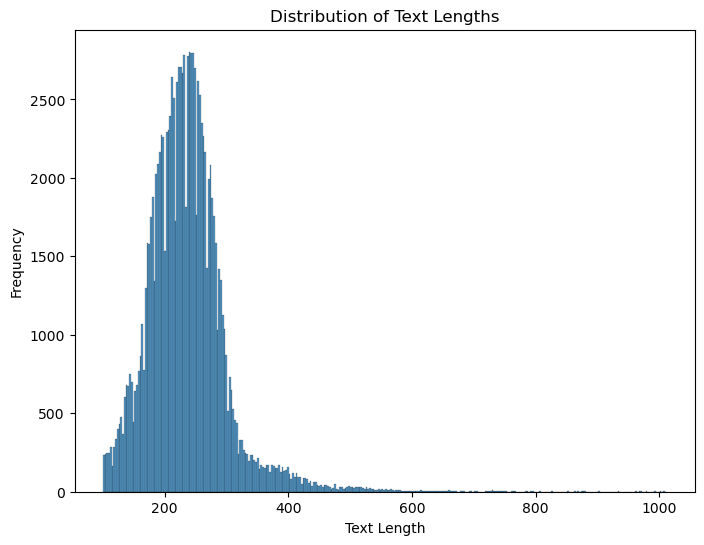

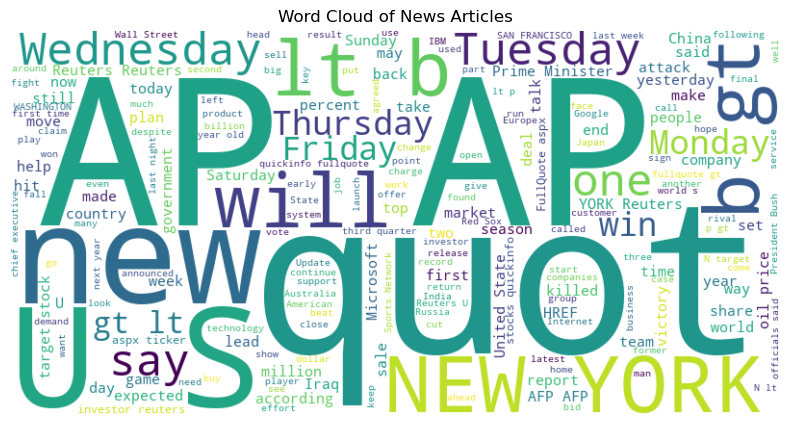

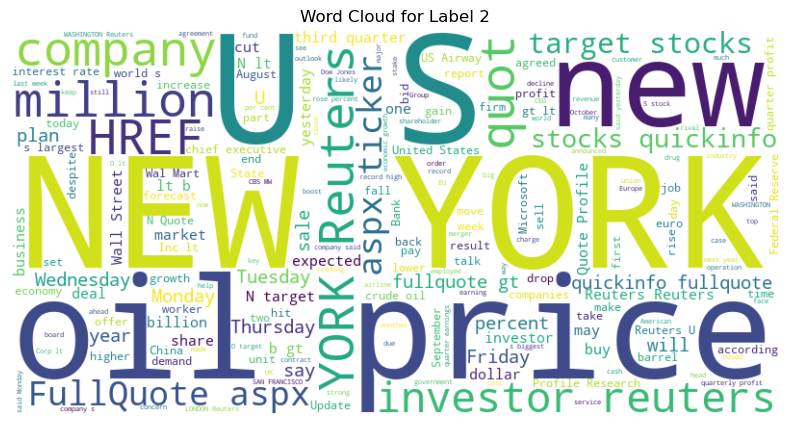

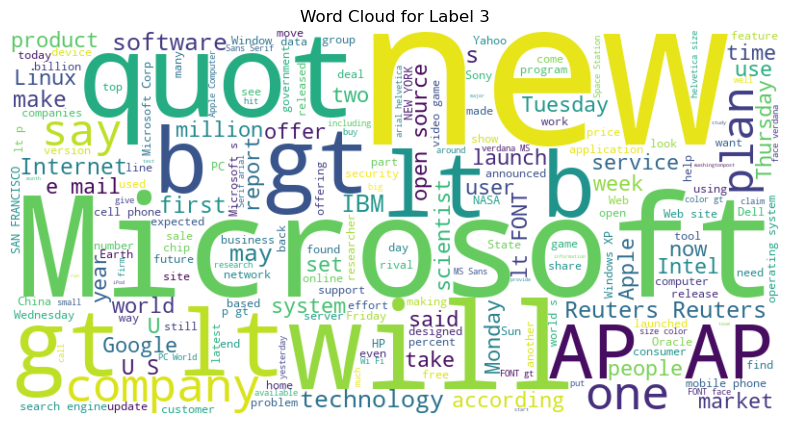

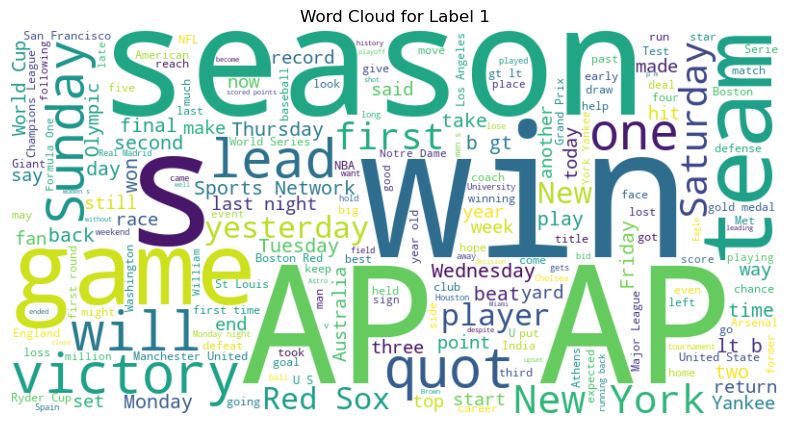

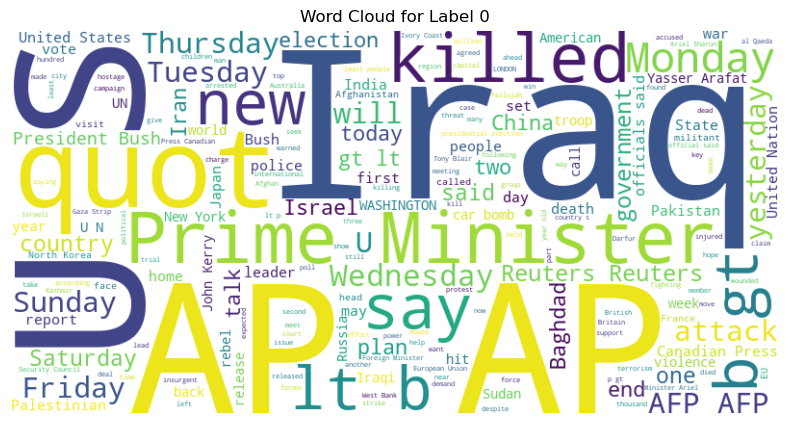

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'text' and 'label' columns
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your file path

# 1. Basic Data Exploration
print(df.info())  # Check data types and missing values
print(df.describe())  # Descriptive statistics for numerical columns
print(df['label'].value_counts())  # Count occurrences of each label


# 2. Analyze Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of News Categories')
plt.xlabel('News Category')
plt.ylabel('Count')
plt.show()

# 3. Analyze Text Length (optional)
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(x='text_length', data=df)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 4. Word Cloud (Optional)
from wordcloud import WordCloud


# Combine all texts into a single string
text = ' '.join(df['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Articles')
plt.show()

# 5. Explore label-specific text patterns (Optional)
for label in df['label'].unique():
    text_for_label = ' '.join(df[df['label'] == label]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_label)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

# Add more analysis as needed, such as:
# - Exploring the frequency of specific words or phrases in each label
# - Creating bigrams or trigrams to understand common word combinations
# - Analyzing the sentiment of text within each label




In [10]:
# prompt: Deploy the previous code on Gradio for me.

def predict_newsgroup(text):
  """Predicts the newsgroup category for a given text."""
  text_vectorized = vectorizer.transform([text])
  prediction = naive_bayes_model.predict(text_vectorized)[0]
  category = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Science/Technology'}
  return category.get(prediction, "Unknown")


iface = gr.Interface(
    fn=predict_newsgroup,
    inputs=gr.Textbox(lines=5, label="Enter News Text"),
    outputs="text",
    title="AG News Classifier",
    description="Enter some text and the model will predict which news category it belongs to.",
)

iface.launch()


Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [13]:
X_test.value_counts()


message
Illinois Governor Seeks Restrictions on Video Game Sales Description: Illinois Gov. Rod Blagojevich is backing state legislation that would ban sales or rentals of video games with graphic sexual or violent content to children under 18.            1
Rentokil shares drop on profit warning Rentokil warned investors to expect lower profits for 2005 after reported a fall in profits for most of the 2004 and revealed it was finally washing its hands of parts of its UK hygiene business.              1
Russia gets budget version of Windows Microsoft effort is designed to wean people off pirated software and the open-source Linux OS.                                                                                                                    1
Amazon creates greenhouse gas THE burning and deforestation of Brazil #39;s vast Amazon rain forest causes nearly 3 per cent of the world #39;s greenhouse gas emissions, according to a government report released today.                        

In [12]:
X_test.nunique()

18000